In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv("D:\\news\\news.csv",encoding='utf-8')
df

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [3]:
df.drop("Unnamed: 0",axis=1,inplace=True)
df

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...
6330,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


## Preprocessing

In [4]:
import spacy
from bs4 import BeautifulSoup
import re
import textblob

In [5]:
nlp = spacy.load('en_core_web_sm')

In [6]:
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how does",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
" u ": " you ",
" ur ": " your ",
" n ": " and ",
"won't": "would not",
'dis': 'this',
'bak': 'back',
'brng': 'bring',"won't": "would not"}

In [7]:
#convert shortcuts to full words-
def cont_to_exp(x):
    if type(x) is str:
        for key in contractions:
            value = contractions[key]
            x = x.replace(key, value)
        return x
    else:
        return x
    

In [8]:
import unicodedata

In [9]:
def remove_accented_chars(x):
    x = unicodedata.normalize('NFKD', x).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return x

In [10]:
from spacy.lang.en.stop_words import STOP_WORDS as stopwords

In [11]:
def make_to_base(x):
    x = str(x)
    x_list = []
    doc = nlp(x)
    
    for token in doc:
        lemma = token.lemma_
        if lemma == '-PRON-' or lemma == 'be':
            lemma = token.text

        x_list.append(lemma)
    return ' '.join(x_list)

In [12]:
def standardize_text(df, content_field):
    df[content_field] = df[content_field].apply(lambda x: cont_to_exp(x))
    #contraction to expansion
    df[content_field] = df[content_field].apply(lambda x: re.sub(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+)',"", x))
    #removing emails
    df[content_field] = df[content_field].apply(lambda x: re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '' , x))
    # removing urls
    df[content_field] = df[content_field].apply(lambda x: re.sub(r'\brt\b', '', x).strip())
    # remove rt
    df[content_field] = df[content_field].apply(lambda x: re.sub(r'[^\w ]+', "", x))
    #removing special characters and punctuations
    df[content_field] = df[content_field].apply(lambda x: ' '.join(x.split()))
    #remove multiple spaces
    df[content_field] = df[content_field].apply(lambda x: BeautifulSoup(x, 'lxml').get_text().strip())
    #removing HTML tags
    df[content_field] = df[content_field].apply(lambda x: remove_accented_chars(x))
    #remove accented characters
    df[content_field] = df[content_field].apply(lambda x: ' '.join([t for t in x.split() if t not in stopwords]))
    #remove stopwords
    df[content_field] = df[content_field].apply(lambda x: make_to_base(x))
    #convert into base form of word
    return df

In [13]:
standardize_text(df,"text")

,title,text,label
0,You Can Smell Hillary’s Fear,Daniel Greenfield Shillman Journalism Fellow F...,FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,US Secretary State John F Kerry say Monday sto...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,Kaydee King KaydeeKing November 9 2016 the les...,FAKE
4,The Battle of New York: Why This Primary Matters,its primary day New York frontrunner Hillary C...,REAL
...,...,...,...
6330,State Department says it can't find emails fro...,the State Department tell Republican National ...,REAL
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,the p PBS should stand plutocratic Pentagon Po...,FAKE
6332,Anti-Trump Protesters Are Tools of the Oligarc...,AntiTrump Protesters Are Tools Oligarchy Refor...,FAKE
6333,"In Ethiopia, Obama seeks progress on peace, se...",ADDIS ababa Ethiopia President Obama convene m...,REAL


In [14]:
df['text'] = df['text'].apply(lambda x: str(x).lower())

In [44]:
corpus=[]
for i in range(0, len(df)):
    message = df['text'][i]
    message = message.split()
    message = ' '.join(message)
    corpus.append(message)

## Tfidf Vectoriser

In [84]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(ngram_range=(1, 3))
X = df['text']

## Encoding of target label-

In [76]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['label'] = encoder.fit_transform(df['label'])

In [77]:
y = df["label"]

## Train test split

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [82]:
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.model_selection import cross_val_score,cross_validate

## Light GBM classifier

In [41]:
# build the lightgbm model
import lightgbm as lgb
lgbc = lgb.LGBMClassifier()
lgbc.fit(X_train, y_train)

LGBMClassifier()

In [74]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,plot_confusion_matrix,precision_score,recall_score

##  Randomized search CV-

In [53]:
from sklearn.model_selection import RandomizedSearchCV

In [24]:
from lightgbm import LGBMClassifier
lgbc= LGBMClassifier()

In [25]:
from sklearn.pipeline import Pipeline

In [86]:
pipe = Pipeline([
    ('tfidf', tfidf),
    ('lgbc', lgbc)
])

In [87]:
lgpr1 = {'lgbc__n_estimators':[200,300],'lgbc__reg_alpha':[0,0.5,1,1.2],'lgbc__reg_lambda':[1.2,0,1,0.5] ,
       'lgbc__learning_rate':[0.1,0.001,0.2,0.3,0.5],'lgbc__n_jobs':[1],'lgbc__max_depth':[6,7,8,10,9],
    'tfidf__max_df': (0.5, 1.0),
    'tfidf__ngram_range': ((1,1), (1,2)),
    'tfidf__use_idf': (True, False),
    'tfidf__analyzer': ('word', 'char', 'char_wb')}

In [88]:
print(lgbc)
full_model = RandomizedSearchCV(pipe,lgpr1,cv=5)
full_model.fit(X_train,y_train)
y_pred=full_model.predict(X_test)
print('ACCURACY_SCORE')
print(accuracy_score(y_test,y_pred))
print('classification_report')
print(classification_report(y_test,y_pred))
print('confusion_matrix')
print(confusion_matrix(y_test,y_pred))
print('precision_score:',precision_score(y_test,y_pred))
print('recall_score:',recall_score(y_test,y_pred))
print(full_model)
auc_score =roc_auc_score(y_test,y_pred)
print('AUC_score',auc_score)
print(full_model.best_params_)
print('\n')
print('\n')

LGBMClassifier()
ACCURACY_SCORE
0.917937927406628
classification_report
              precision    recall  f1-score   support

           0       0.91      0.92      0.92       943
           1       0.92      0.91      0.92       958

    accuracy                           0.92      1901
   macro avg       0.92      0.92      0.92      1901
weighted avg       0.92      0.92      0.92      1901

confusion_matrix
[[869  74]
 [ 82 876]]
precision_score: 0.9221052631578948
recall_score: 0.9144050104384134
RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('tfidf',
                                              TfidfVectorizer(ngram_range=(1,
                                                                           3))),
                                             ('lgbc', LGBMClassifier())]),
                   param_distributions={'lgbc__learning_rate': [0.1, 0.001, 0.2,
                                                                0.3, 0.5],
                      

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [28]:
tfidf1 = TfidfVectorizer(ngram_range=(1,2),max_df=0.5,analyzer='word')

In [79]:
X = tfidf1.fit_transform(df['text'])
y=df['label']

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [92]:
model = LGBMClassifier(reg_alpha=0.5,reg_lambda=1,n_jobs=1,n_estimators=200,max_depth=10)

model_name : LGBMClassifier(max_depth=10, n_estimators=200, n_jobs=1, reg_alpha=0.5,
               reg_lambda=1)
[[876  67]
 [ 83 875]]
accuracy:  0.9210941609679116
precision:  0.9288747346072187
recall:  0.9133611691022965
AUC_score 0.9211556640845523






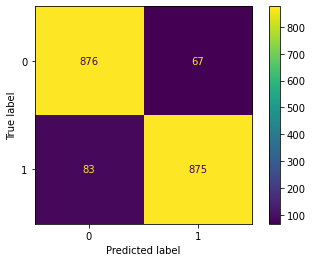

In [93]:
model.fit(X_train,y_train)
preds = model.predict(X_test)
accu= accuracy_score(y_test,preds)
precision=precision_score(y_test,preds)
recall=recall_score(y_test,preds)
print('model_name :',model)
print(confusion_matrix(y_test,preds))
print('accuracy: ',accu)
print('precision: ',precision)
print('recall: ',recall)
plot_confusion_matrix(model,X_test,y_test)
auc_score =roc_auc_score(y_test,preds)
print('AUC_score',auc_score)
print('\n')
print('\n')

## Bayesian Optimization using Gaussian Processes-

In [19]:
import skopt

In [20]:
from sklearn.model_selection import cross_val_score, train_test_split

from skopt import gp_minimize # Bayesian Opt with GP

# for the analysis
from skopt.plots import (
    plot_convergence,
    plot_evaluations,
    plot_objective,
)

from skopt.space import Real, Integer, Categorical
from skopt.utils import use_named_args

In [61]:
param_grid = [
    Integer(100, 400, name="n_estimators"),
    Integer(6, 10, name="max_depth"),
    Real(0.1, 1, prior='uniform', name='learning_rate'),
    Real(0.2, 1.5, prior='uniform', name="reg_alpha"),
    Real(0.2, 1.5, prior='uniform', name="reg_lambda"),
]

# Scikit-optimize parameter grid is a list
type(param_grid)

list

In [62]:
@use_named_args(param_grid)
def objective(**params):
    
    # model with new parameters
    lgbc.set_params(**params)

    # optimization function (hyperparam response function)
    value = np.mean(
        cross_val_score(
            lgbc, 
            X_train,
            y_train,
            cv=3,
            n_jobs=-4,
            scoring='roc_auc')
    )

    # negate because we need to minimize
    return -value

In [63]:
from skopt import callbacks
from skopt.callbacks import CheckpointSaver

In [64]:
checkpoint_saver = CheckpointSaver("./checkpoint.pkl", compress=9)

In [65]:
gp_ = gp_minimize(
    objective, # the objective function to minimize
    param_grid, # the hyperparameter space
    n_initial_points=20, # the number of points to evaluate f(x) to start of
    acq_func='EI', # the acquisition function
    n_calls=30,# the number of subsequent evaluations of f(x)
    callback=[checkpoint_saver],
    random_state=101,
)

In [66]:
"Best score=%.4f" % gp_.fun

'Best score=-0.9744'

In [71]:
print("""Best parameters:
=========================
- n_estimators = %d
- max-depth = %d
- learning_rate = %.3f
- reg_alpha = %.3f
- reg_lambda = %.3f """% (gp_.x[0],
                  gp_.x[1],
                  gp_.x[2],
                  gp_.x[3],
                  gp_.x[4],
                    ))

Best parameters:
- n_estimators = 334
- max-depth = 6
- learning_rate = 0.164
- reg_alpha = 0.206
- reg_lambda = 0.304 


In [98]:
modelb = LGBMClassifier(reg_alpha=0.206,reg_lambda=0.304,n_estimators=334,max_depth=6,learning_rate=0.164)

model_name : LGBMClassifier(learning_rate=0.164, max_depth=6, n_estimators=334,
               reg_alpha=0.206, reg_lambda=0.304)
[[885  58]
 [ 77 881]]
accuracy:  0.9289847448711205
precision:  0.9382321618743344
recall:  0.9196242171189979
AUC_score 0.9290591923346846






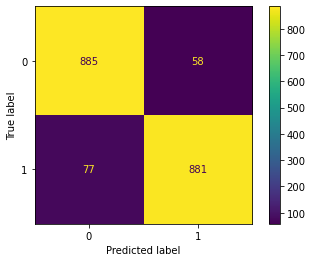

In [99]:
modelb.fit(X_train,y_train)
preds = modelb.predict(X_test)
accu= accuracy_score(y_test,preds)
precision=precision_score(y_test,preds)
recall=recall_score(y_test,preds)
print('model_name :',modelb)
print(confusion_matrix(y_test,preds))
print('accuracy: ',accu)
print('precision: ',precision)
print('recall: ',recall)
plot_confusion_matrix(modelb,X_test,y_test)
auc_score =roc_auc_score(y_test,preds)
print('AUC_score',auc_score)
print('\n')
print('\n')

## Bayesian Optimization with  Random Forests-

In [87]:
from skopt import forest_minimize

In [91]:
@use_named_args(param_grid)
def objective(**params):
    
    # model with new parameters
    lgbc.set_params(**params)

    # optimization function (hyperparam response function)
    value = np.mean(
        cross_val_score(
            lgbc, 
            X_train,
            y_train,
            cv=3,
            n_jobs=-4,
            scoring='roc_auc')
    )

    # negate because we need to minimize
    return -value

In [94]:
fm_ = forest_minimize(
    objective, # the objective function to minimize
    param_grid, # the hyperparameter space
    base_estimator = 'RF', # the surrogate
    n_initial_points=20, # the number of points to evaluate f(x) to start of
    acq_func='EI', # the acquisition function
    n_calls=30,# the number of subsequent evaluations of f(x)
    callback=[checkpoint_saver],
    random_state=0, 
    n_jobs=4
)

In [95]:
"Best score=%.4f" % fm_.fun

'Best score=-0.9737'

In [97]:
print("""Best parameters:
=========================
- n_estimators = %d
- max-depth = %d
- learning_rate = %.3f
- reg_alpha = %.3f
- reg_lambda = %.3f """% (fm_.x[0],
                  fm_.x[1],
                  fm_.x[2],
                  fm_.x[3],
                  fm_.x[4],
                    ))

Best parameters:
- n_estimators = 363
- max-depth = 8
- learning_rate = 0.150
- reg_alpha = 0.787
- reg_lambda = 0.226 


In [100]:
model2 = LGBMClassifier(reg_alpha=0.787,reg_lambda=0.226,n_estimators=363,max_depth=8,learning_rate=0.150)

model_name : LGBMClassifier(learning_rate=0.15, max_depth=8, n_estimators=363,
               reg_alpha=0.787, reg_lambda=0.226)
[[877  66]
 [ 72 886]]
accuracy:  0.9274066280904787
precision:  0.930672268907563
recall:  0.9248434237995825
AUC_score 0.9274270141267267






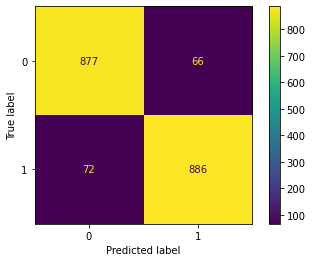

In [101]:
model2.fit(X_train,y_train)
preds = model2.predict(X_test)
accu= accuracy_score(y_test,preds)
precision=precision_score(y_test,preds)
recall=recall_score(y_test,preds)
print('model_name :',model2)
print(confusion_matrix(y_test,preds))
print('accuracy: ',accu)
print('precision: ',precision)
print('recall: ',recall)
plot_confusion_matrix(model2,X_test,y_test)
auc_score =roc_auc_score(y_test,preds)
print('AUC_score',auc_score)
print('\n')
print('\n')

I tried to use __Bayesian optimaization__ for hyperparameter tuning instead of Randomized Search CV and found better parameters during the process of evaluation.

## Saving the model-

In [102]:
import joblib

In [103]:
joblib.dump(modelb,"light_final_model.obj")

['light_final_model.obj']

In [104]:
loaded_model = joblib.load("light_final_model.obj")

In [105]:
loaded_model

LGBMClassifier(learning_rate=0.164, max_depth=6, n_estimators=334,
               reg_alpha=0.206, reg_lambda=0.304)